### Zillow Data

In [101]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")

In [5]:
print(os.getcwd())

/Users/speedeonloaner/Documents/Georgetown_Fall_2024/data_science_1/final_project/PPOL_5203_FinalProject


In [9]:
##import housing data
housing_data = pd.read_csv("./data/zillow/zillow_housing_neighborhood_dc.csv", encoding='utf-8')

In [13]:
housing_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24
0,121697,351,Columbia Heights,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,128365.922980,...,644170.047983,644019.064424,644743.689652,645270.309480,643357.881900,638786.079529,634370.181189,630870.528000,630434.535100,630304.591840
1,121685,387,Capitol Hill,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,209056.189265,...,913032.444616,910925.961300,910974.620300,911809.044445,910670.844642,906407.478126,902717.546268,900470.681300,902069.720797,903311.527014
2,121774,740,Petworth,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,141216.817840,...,679801.120333,678476.087043,679018.369920,679949.420919,679388.155413,675121.882485,669955.606700,663863.046458,661105.866279,659101.136712
3,121668,816,Adams Morgan,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,167995.626724,...,581187.407590,581224.931615,582268.766564,583166.123988,583306.066414,581452.281209,579612.351904,578123.410176,579435.486200,581161.059991
4,403481,890,Sixteenth Street Heights,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,164864.732884,...,771301.547100,770192.858789,770981.797187,773258.812468,774139.984599,771304.847277,767026.588197,762298.012441,761328.329915,760720.622547


In [73]:
neighborhoods = [
    'Adams Morgan', 'American University Park', 'Anacostia', 'Barnaby Woods', 
    'Capitol Hill', 'Columbia Heights', 'Cleveland Park', 'Dupont', 
    'Foggy Bottom', 'Friendship Heights', 'Georgetown', 'Glover Park', 
    'H Street', 'Logan Circle', 'Mount Pleasant', 'Navy Yard', 
    'NoMa', 'Petworth', 'Shaw', 'Southwest Waterfront', 'Takoma', 
    'Tenleytown', 'The Palisades', 'U Street', 'West End', 'Woodley Park'
]

query_string = ' or '.join([f'RegionName == "{neighborhood}"' for neighborhood in neighborhoods])

In [75]:
housing_data_filtered =  (
    housing_data.filter(['RegionName','State','City', '1/31/21', '2/28/21', '3/31/21', '4/30/21', '5/31/21', '6/30/21',
                        '7/31/21', '8/31/21', '9/30/21', '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22', 
                         '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22', '10/31/22', '11/30/22', '12/31/22', '1/31/23', 
                         '2/28/23', '3/31/23', '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23', '10/31/23', '11/30/23', 
                         '12/31/23', '1/31/24', '2/29/24', '3/31/24', '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24', 
                         '10/31/24']).melt(id_vars=['RegionName', 'State', 'City'], var_name='EndMonth', value_name='MedianHomeValue').query(query_string)
                         )

In [85]:
housing_data_filtered.shape

(1058, 5)

In [97]:
housing_data_filtered_na = housing_data_filtered[~housing_data_filtered['MedianHomeValue'].isna()]
housing_data_filtered_na['EndMonth'] = pd.to_datetime(housing_data_filtered_na['EndMonth'])
housing_data_filtered_na.shape

(1045, 5)

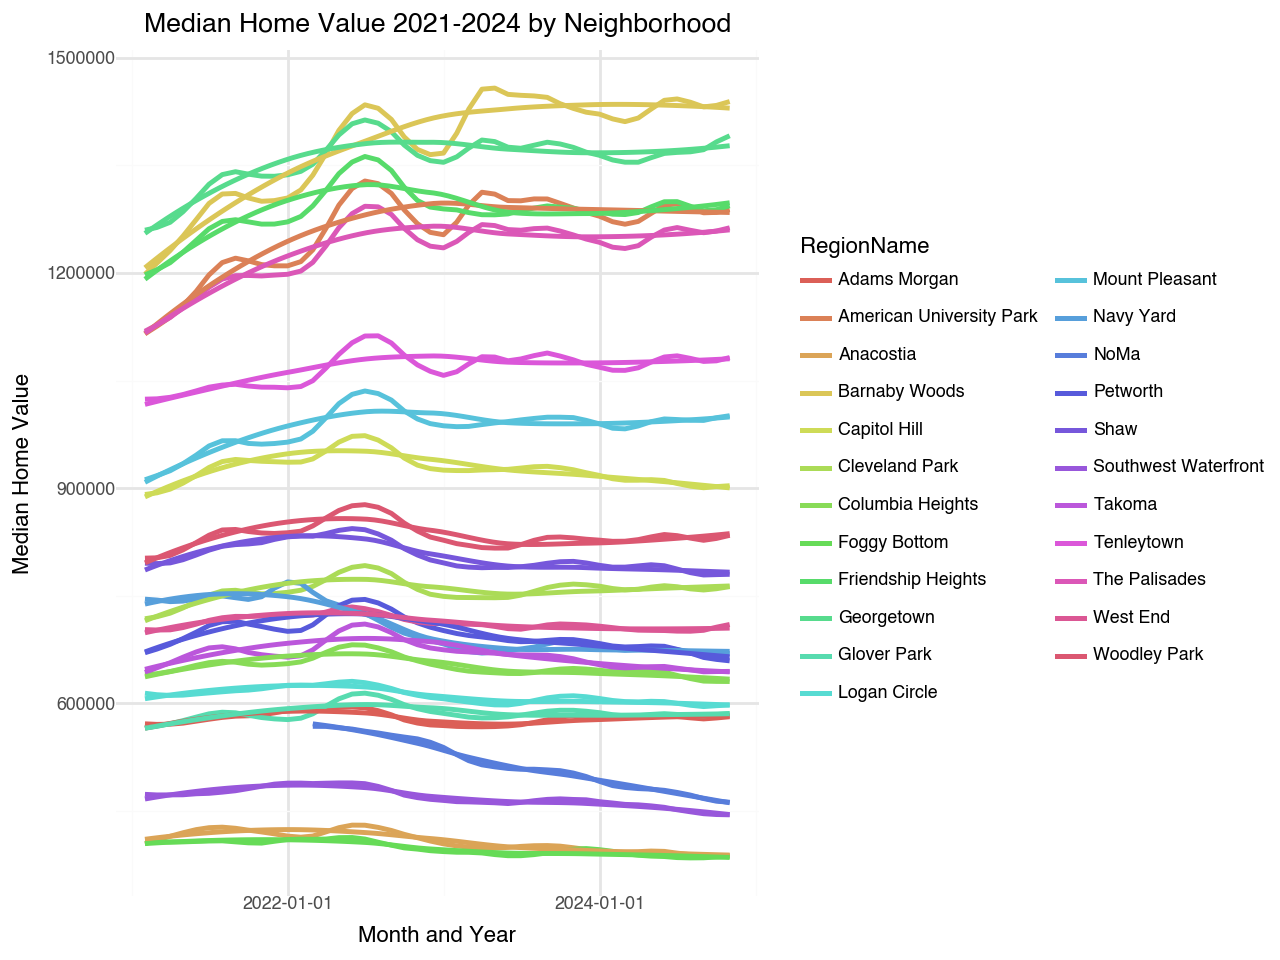

In [109]:
# step 1: data
(ggplot(data=housing_data_filtered_na) + 

 geom_line(aes(x="EndMonth", y="MedianHomeValue", color="RegionName"), size = 1) +

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="EndMonth", y="MedianHomeValue", color="RegionName"), method='loess', se=False) +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Month and Year", y="Median Home Value", title="Median Home Value 2021-2024 by Neighborhood"))
 